# 1. Introduction

[add intro here]

# 2. Datasheet

[add datasheet here]

# 3. Data Imports

In [1]:
import pandas as pd

In [2]:
features = pd.read_csv("diabetes_feature.csv")
target = pd.read_csv("diabetes_target.csv")

In [3]:
features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [4]:
target

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


We fetch the dataset directly from the UCI Machine Learning Repository. We grab the features and target dataset separately. When evaluating for data quality, no missing values were found, and class balance appears appropriate within each sub group for the sensitive attributes in consideration. We download this imported dataset as our cleaned dataset in .csv form.

# 4. Data Summary

# Figure 1

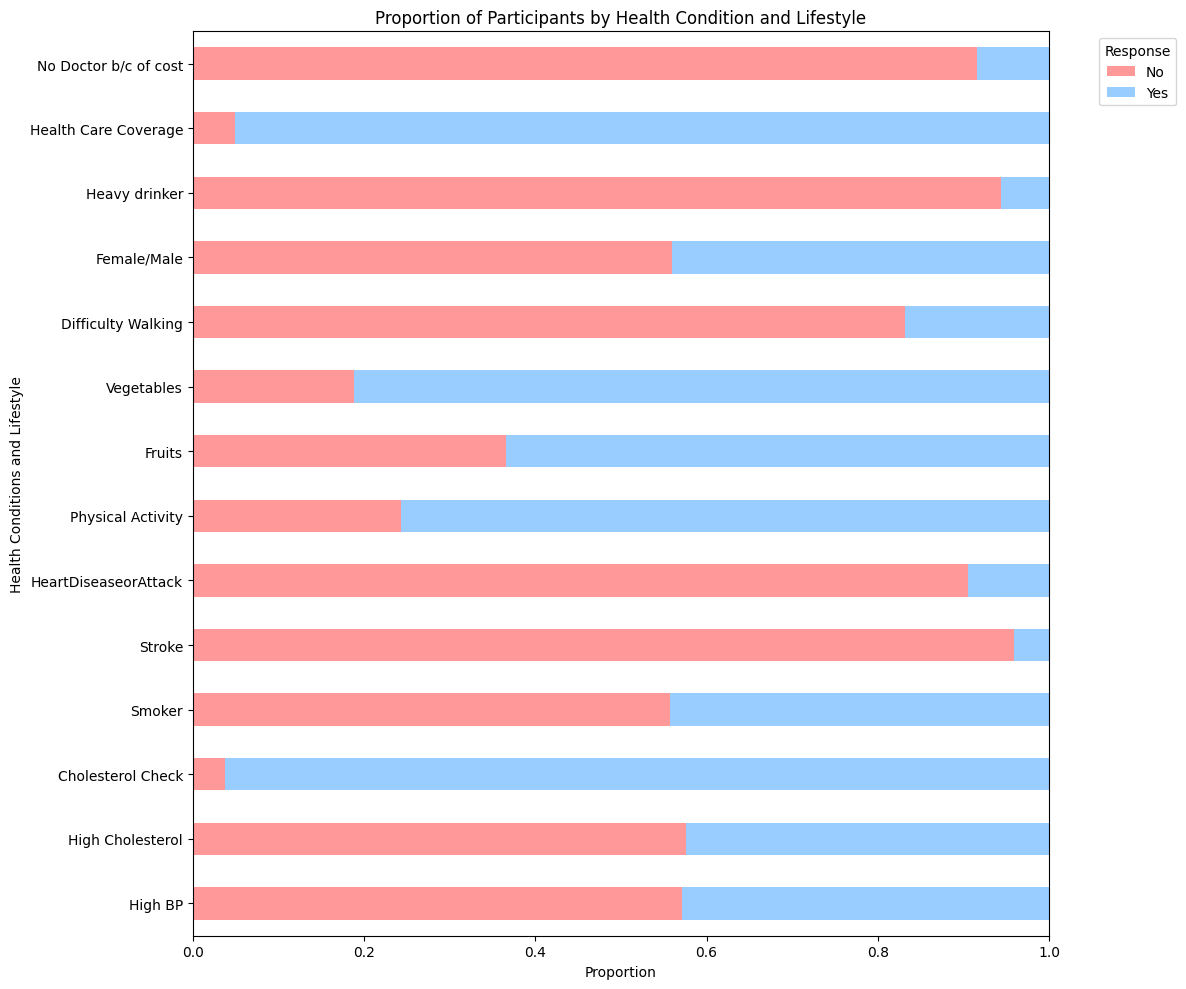

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

binary_categorical_vars = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'DiffWalk', 'Sex', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'
]

# Create a DataFrame to hold proportion data for plotting
data_for_plot = pd.DataFrame({
    var: features[var].value_counts(normalize=True).sort_index()
    for var in binary_categorical_vars
}).T

# Renaming the columns
rename_dict = {
    'Sex': 'Female/Male',
    'DiffWalk': 'Difficulty Walking',
    'Veggies': 'Vegetables',
    'PhysActivity': 'Physical Activity',
    'CholCheck': 'Cholesterol Check',
    'HighChol': 'High Cholesterol',
    'HighBP': 'High BP',
    'NoDocbcCost': 'No Doctor b/c of cost',
    'AnyHealthcare': 'Health Care Coverage',
    'HvyAlcoholConsump':'Heavy drinker'
}

data_for_plot_renamed = data_for_plot.rename(index=rename_dict)

colors = {'0': '#ff9999', '1': '#99ccff'}

# Creating the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
data_for_plot_renamed.plot(kind='barh', stacked=True, color=[colors[str(int(i))] for i in data_for_plot.columns], ax=ax)
ax.set_title('Proportion of Participants by Health Condition and Lifestyle')
ax.set_xlabel('Proportion')
ax.set_ylabel('Health Conditions and Lifestyle')
ax.set_xlim([0, 1])

handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Yes']
ax.legend(handles, new_labels, title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The graph shows data on participants' health conditions and lifestyle choices relevant to diabetes risk. Key points include high rates of high blood pressure and cholesterol, critical predictors for diabetes. Most participants have undergone cholesterol checks, suggesting active health monitoring. About 77% engage in physical activities, and a similar proportion consumes fruits and vegetables daily, promoting better health outcomes. Coverage is high with 90% having health insurance, though 15% avoided medical care due to costs, indicating economic barriers. This information is important for training LightGBM model, as it helps to understand how different factors like lifestyle and existing health conditions can influence diabetes risk and ensure the model predicts fairly across different groups.

# Figure 2

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Age_desc = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

Education_desc = {
    1: 'No school/kindergarten',
    2: '1-8 (Elementary)',
    3: '9-11 (Some HS)',
    4: '12 or GED (HS grad)',
    5: 'College 1-3 yr (Some college)',
    6: 'College 4+ yr (College grad)'
}

Income_desc = {
    1: '<$10K', 2: '$10K-$14,999', 3: '$15K-$19,999', 4: '$20K-$24,999',
    5: '$25K-$34,999', 6: '$35K-$49,999', 7: '$50K-$74,999', 8: '$75K+'
}

features_copy = features.copy()
# Applying the mapping
features_copy['Age'] = features_copy['Age'].map(Age_desc)
features_copy['Education'] = features_copy['Education'].map(Education_desc)
features_copy['Income'] = features_copy['Income'].map(Income_desc)
features_copy.rename(columns={'PhysHlth': 'Physical Health', 'GenHlth': 'General Health', 'MentHlth': 'Mental Health'}, inplace=True)


In [7]:
features_copy.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,General Health,Mental Health,Physical Health,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,60-64,12 or GED (HS grad),"$15K-$19,999"
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,50-54,College 4+ yr (College grad),<$10K
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,60-64,12 or GED (HS grad),$75K+
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,70-74,9-11 (Some HS),"$35K-$49,999"
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,70-74,College 1-3 yr (Some college),"$20K-$24,999"


<ipython-input-8-8250a90e5279>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.countplot(y='Age', data=features_copy, ax=axes[3], palette='pastel', order=sorted(features_copy['Age'].unique()))
<ipython-input-8-8250a90e5279>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  education_plot = sns.countplot(y='Education', data=features_copy, ax=axes[4], palette='pastel', order=[Education_desc[key] for key in sorted(Education_desc.keys())])
<ipython-input-8-8250a90e5279>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  income_plot = sns.countplot(y='Income', data=

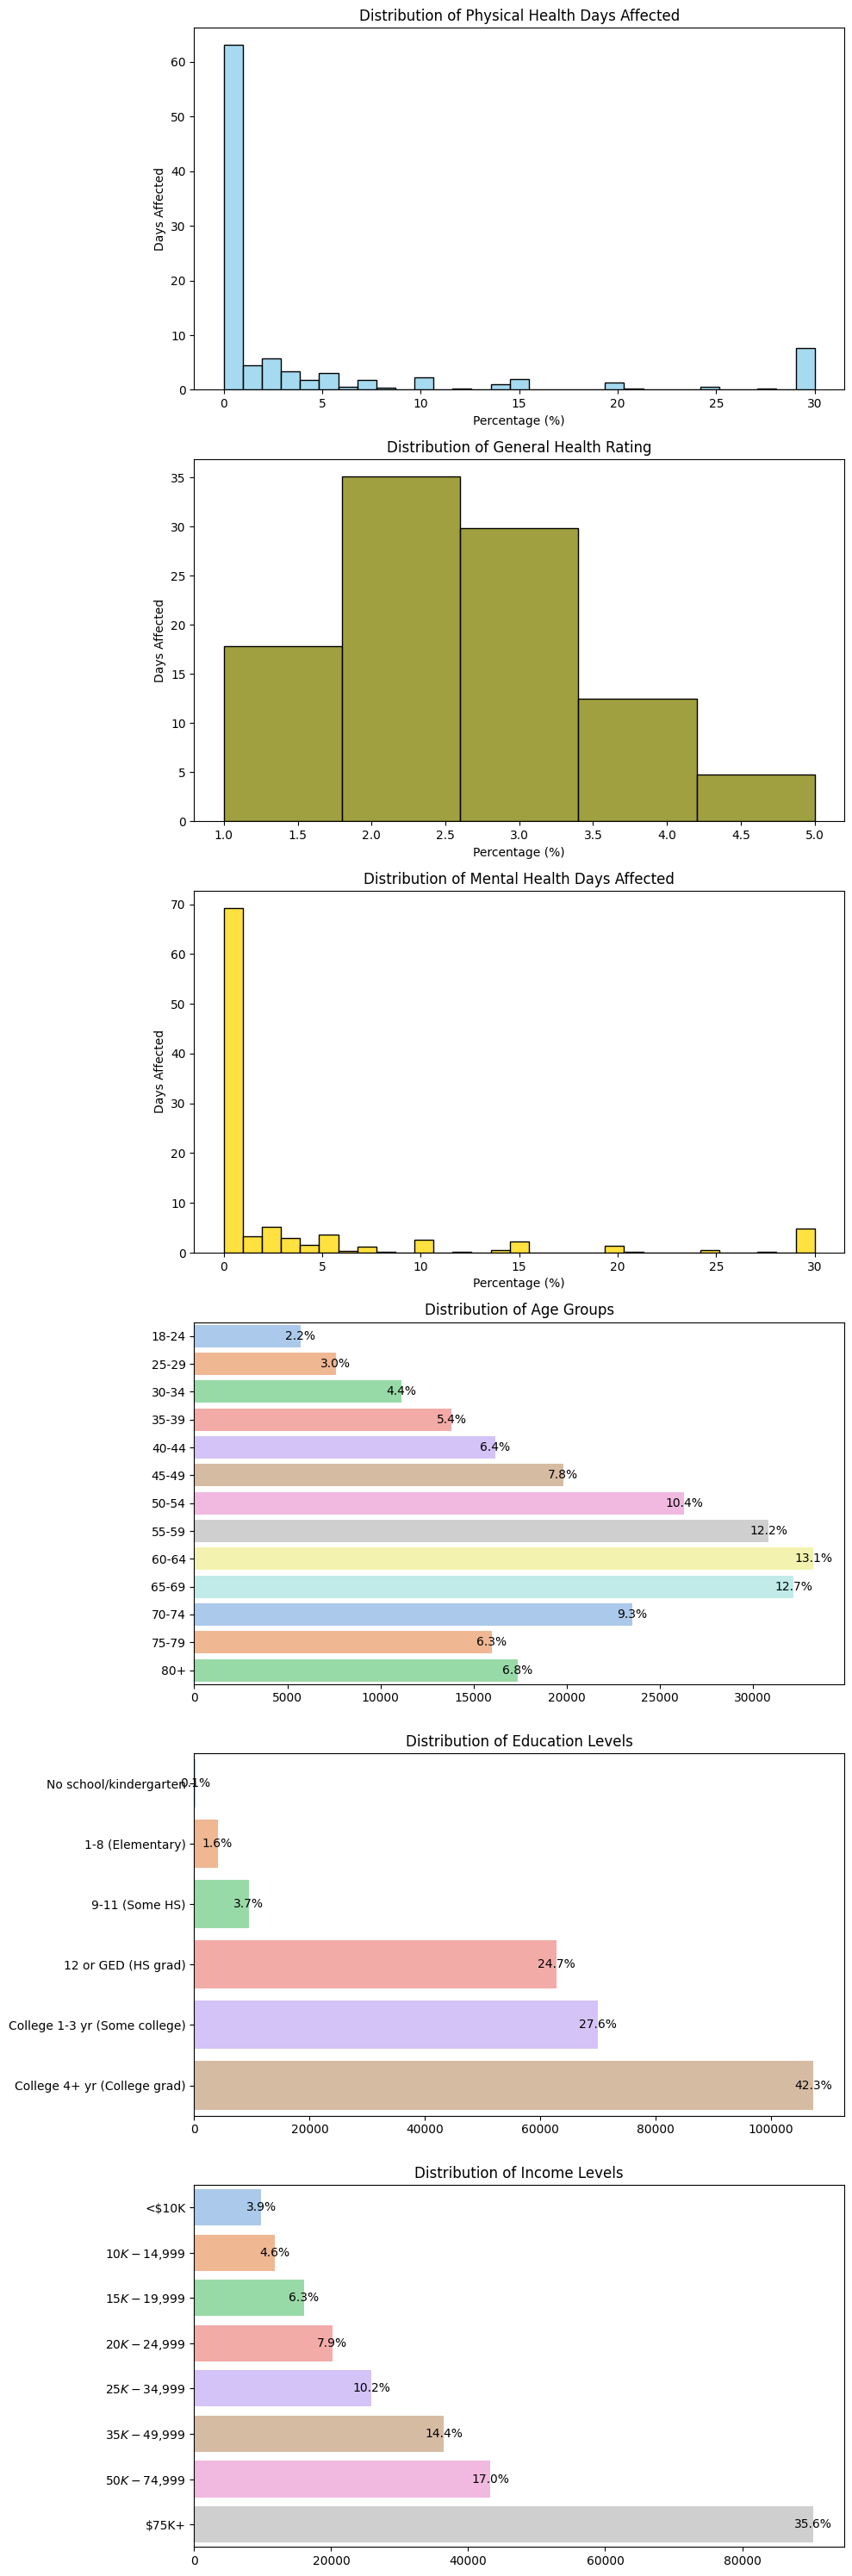

In [8]:
def show_percentages(ax):
    total = float(len(features_copy))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, percentage, ha="center", va="center")

# Creating the plots for numeric scales along with Age, Education, and Income
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30))

# Plotting distributions for numeric scale variables (Physical Health, General Health, Mental Health)
sns.histplot(data=features_copy, x='Physical Health', bins=31, kde=False, color="skyblue", ax=axes[0], stat="percent", common_norm=False)
sns.histplot(data=features_copy, x='General Health', bins=5, kde=False, color="olive", ax=axes[1], stat="percent", common_norm=False)
sns.histplot(data=features_copy, x='Mental Health', bins=31, kde=False, color="gold", ax=axes[2], stat="percent", common_norm=False)

# Plotting distributions for Age, Education, and Income
age_plot = sns.countplot(y='Age', data=features_copy, ax=axes[3], palette='pastel', order=sorted(features_copy['Age'].unique()))
education_plot = sns.countplot(y='Education', data=features_copy, ax=axes[4], palette='pastel', order=[Education_desc[key] for key in sorted(Education_desc.keys())])
income_plot = sns.countplot(y='Income', data=features_copy, ax=axes[5], palette='pastel', order=[Income_desc[key] for key in sorted(Income_desc.keys())])

show_percentages(age_plot)
show_percentages(education_plot)
show_percentages(income_plot)

axes[0].set_title('Distribution of Physical Health Days Affected')
axes[1].set_title('Distribution of General Health Rating')
axes[2].set_title('Distribution of Mental Health Days Affected')
axes[3].set_title('Distribution of Age Groups')
axes[4].set_title('Distribution of Education Levels')
axes[5].set_title('Distribution of Income Levels')

for ax in axes[:3]:
    ax.set_xlabel('Percentage (%)')
    ax.set_ylabel('Days Affected')

for ax in axes[3:]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

The graphs show that there might be an imbalance in the data used for training the LightGBM model, especially with more participants who make $75K or more (35.6%) and those who are college graduates (42.3%). This skew towards higher income and education levels could lead to a model that predicts better for wealthier and more educated individuals while not performing as well for those from lower income or education groups. This imbalance is important to address because it can make the model biased, meaning it might not work equally well for everyone.

# Figure 3

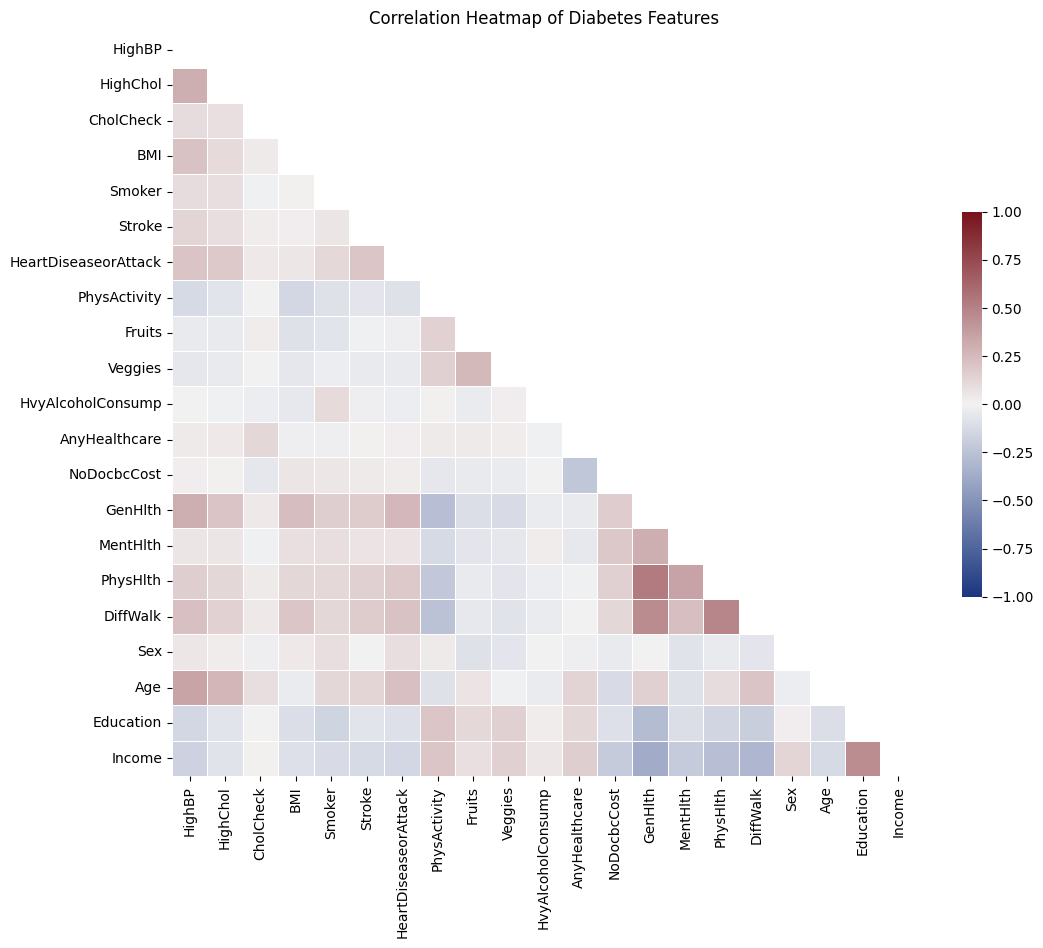

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = features.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(260, 10, s=85, l=25, as_cmap=True)

max_corr = np.max(np.abs(corr.values))

plt.figure(figsize=(12, 10))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr, vmin=-max_corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Heatmap of Diabetes Features' )
plt.show()

The Correlation Heatmap shows how different health and demographic features relate to diabetes risk. It highlights strong links between diabetes and high blood pressure, high cholesterol, and body mass index (BMI), indicating these are important predictors. Healthier behaviors like physical activity and eating fruits and vegetables tend to lower diabetes risk. The data also shows variations in health indicators across different age, income, and education levels, suggesting the model might perform better for people with higher income and education. Addressing these imbalances is important to ensure the model works fairly for all groups.

# Figure 4

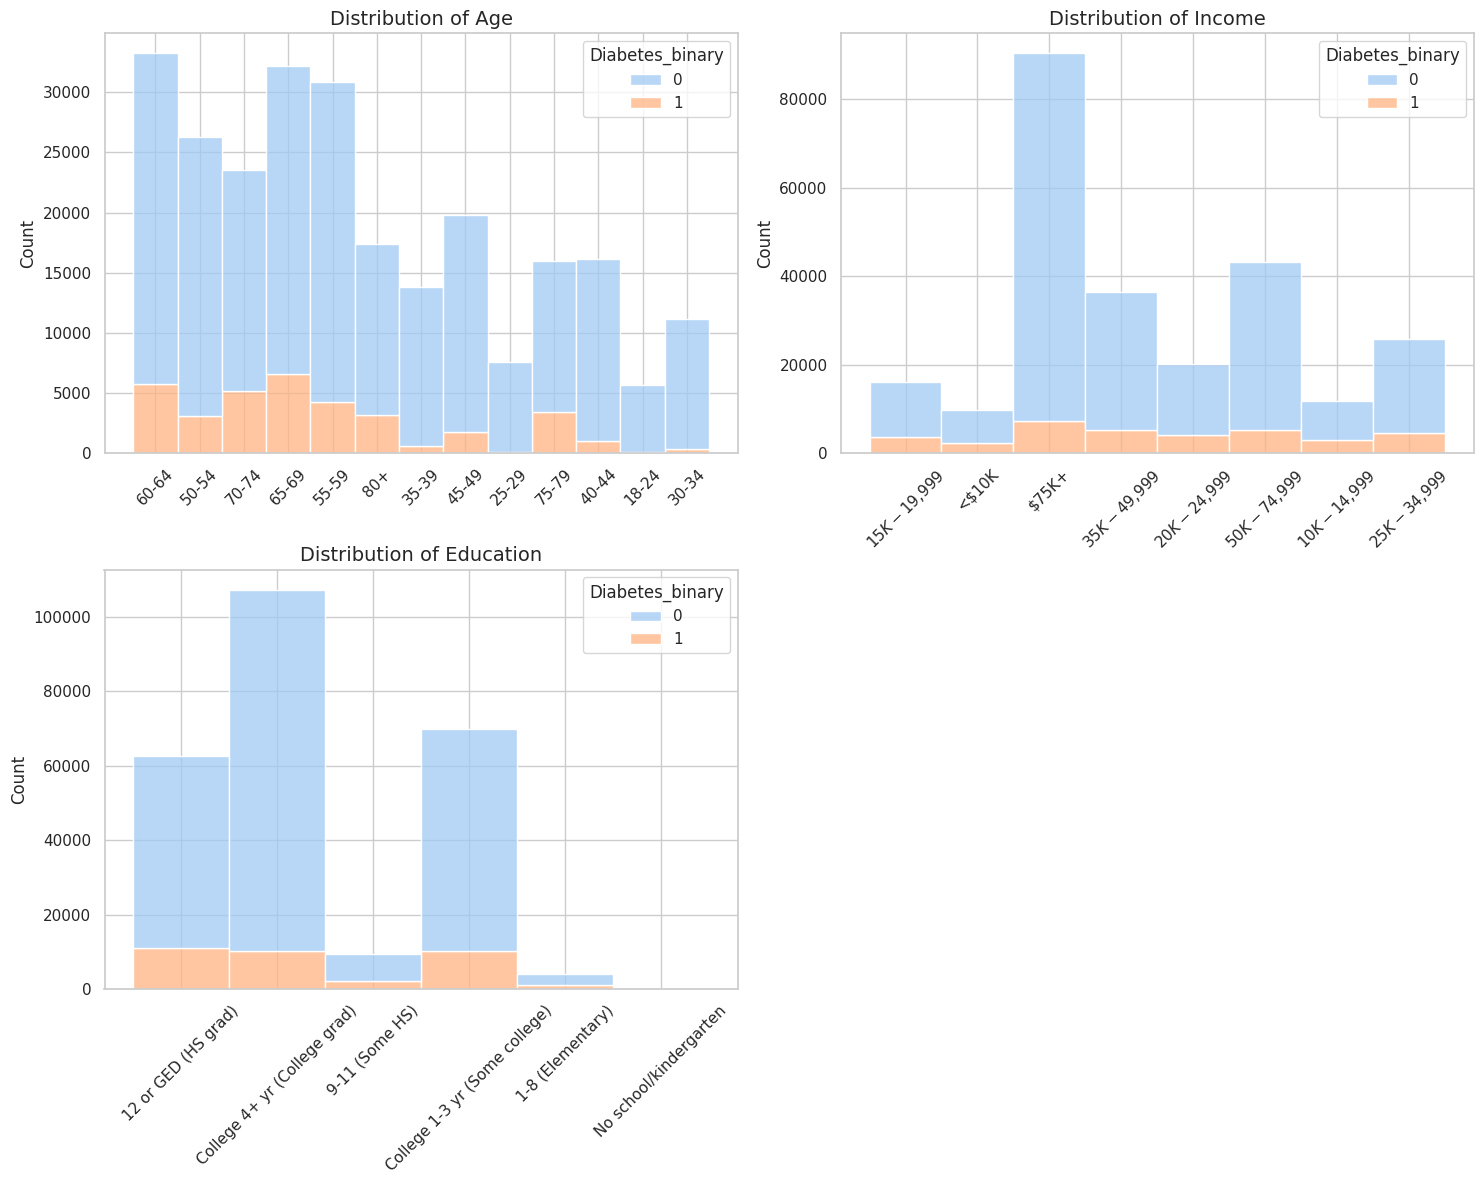

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = features_copy.join(target)

# Selected features for focused visualization
selected_features = ['Age', 'Income', 'Education']

# Setting up the plot for selected features
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plotting histograms
for i, col in enumerate(selected_features):
    sns.histplot(data=data_df, x=col, hue="Diabetes_binary", multiple="stack", ax=axes[i], palette="pastel")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


The graphs show data on age, income, and education for participants with and without diabetes (0 = no diabetes, 1 = prediabetes or diabetes). Here is the analysis:

- Age: Most participants are middle-aged (50-69 years), which typically have higher diabetes risks.
- Income: Participants earning $75K or more are mostly without diabetes, suggesting that higher income might link to lower diabetes risk.
- Education: Higher education levels, like college graduates, are common among those without diabetes, indicating a possible connection between more education and reduced diabetes risk.

The data highlights potential imbalances, with more data from wealthier and more educated participants, especially those without diabetes. This could affect the fairness of the diabetes prediction model.

# 5. Modeling

In [11]:
# [add modeling code here]

# 6. Results

In [12]:
# [add code for results]

# 7. Conclusions and Limitations

[add conclusions and limitations here]


# 8. Contribution Notes

[add contribution notes here]

# 9. Sources Cited

[add sources cited here]